# Fourier Series

In this notebook, we will look at using a numerical integrator from the scipy library to create a Fourier series for a function with period 2L,
$$ f(x) = \frac{a_0}{2} + \sum_{n=1}^{\infty} \bigg( a_n cos\frac{n \pi x}{L} + b_n sin\frac{n \pi x}{L} \bigg) $$
The Fourier coefficients $a_n$ and $b_n$ are computed as follows:
$$ a_n = \frac{1}{L} \int_c ^d f(x) cos \frac{n \pi x}{L} \mathrm{d}x $$
$$ b_n = \frac{1}{L} \int_c ^d f(x) sin \frac{n \pi x}{L} \mathrm{d}x $$
where c and d are the limits of the space where the function is periodic, and 
$$ 2L = d - c $$

We will see the effect of adding more terms to a series in seeing it converge towards the "real" value for f(x)

To do this, first we will import the requisite modules:

In [1]:
#NAME: Fourier Series
#DESCRIPTION: Creating a Fourier series for a function with period 2L.

%matplotlib notebook
import numpy as np
import scipy.integrate as integrate
from numpy import cos, sin, pi
import matplotlib.pyplot as plt
from matplotlib import animation

First, we define a function, generate_fourier_func, which, given a periodic function, the number of terms to evaluate, and the limits, creates a series, and returns a function (fourier_func), which will evaluate the sum of the series up to a certain number of terms

In [2]:
def generate_fourier_series(num_terms, from_func, limits):
    function_series = []
    func = from_func
    diff = limits[1] - limits[0]
    integral, __ = integrate.quad(func, limits[0], limits[1])
    a0 = 2 * integral / diff
    function_series.append(lambda x: a0/2)
    n = 1
    
    while n <= num_terms:
        cos_part = lambda x, n=n: func(x) * cos((2 * n * pi * x)/diff)
        sin_part = lambda x, n=n: func(x) * sin((2 * n * pi * x)/diff)
        integral, __ = integrate.quad(cos_part, limits[0], limits[1])
        an = 2 * integral / diff
        integral, __ = integrate.quad(sin_part, limits[0], limits[1])
        bn = 2 * integral / diff
        f1 = lambda x, an=an, bn=bn, n=n: an * cos((2 * n * pi * x)/diff) + bn * sin((2 * n * pi * x)/diff)
        function_series.append(f1)
        n += 1

    def fourier_func(x, evaluate_terms=None):
        to_return = 0.
        if not evaluate_terms:
            evaluate_terms = len(function_series)
        if evaluate_terms > len(function_series):
            evaluate_terms = len(function_series)
        terms_evaluated = 0
        while terms_evaluated < evaluate_terms:
            to_return += function_series[terms_evaluated](x)
            terms_evaluated += 1
        return to_return
    
    return fourier_func

We will then define the function we want to get the Fourier transform of. We will use a square wave as an example, so that we can observe Gibbs phenomenon.

In [3]:
def f(x):
    if x < 0.:
        return 1.
    else:
        return 0.

The following cell sets up the animation and performs it. With time, we will see the square wave forming, and the Gibbs phenomenon occuring.

<IPython.core.display.Javascript object>


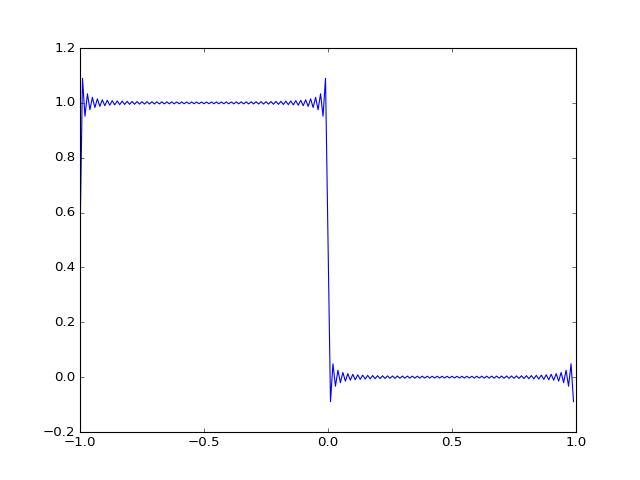

In [4]:
def animate(i):
    line.set_ydata(func(x, evaluate_terms=i))  
    return line,


def init():
    line.set_ydata(np.ma.array(x, mask=True))
    return line,


limits = [-1., 1.]
num_terms = 100
func = generate_fourier_series(num_terms=num_terms, from_func=f, limits=limits)
x = np.arange(-1., 1., 0.01)
fig, ax = plt.subplots()
line, = ax.plot(x, func(x, evaluate_terms=0))
numframes = num_terms + 50
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=numframes, interval=20, blit=True)
plt.show()